<a href="https://colab.research.google.com/github/edwin-19/quandantics_training/blob/master/ExportYoloV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ibaiGorordo/ONNX-YOLOv8-Object-Detection.git
!pip install onnxruntime
!pip install imread-from-url
!pip install ultralytics

Cloning into 'ONNX-YOLOv8-Object-Detection'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 53 (delta 20), reused 35 (delta 7), pack-reused 0
Unpacking objects: 100% (53/53), 17.03 MiB | 17.49 MiB/s, done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 2.7 MB/s eta 0:00:00
  Created wheel for imread-from-url: filename=imread_from_url-0.1.3-py3-none-any.whl size=6623 sha256=5a9afa13bfdb69db49ceff8ef77cb7d0fcc38537dcc26488a7816be3ff336af2
  Stored in directory: /root/.cache/pip/wheels/47/24/56/bc160aec720e92305755f5bbf040ae3c81f826b1121c01f184
Successfully built imread-from-url
     ━━━━━━━━━━━━━━━━

In [2]:
from ultralytics import YOLO

model_name = 'yolov8m' #@param ["yolov8n", "yolov8s", "yolov8m", "yolov8l", "yolov8x"]
input_width = 640 #@param {type:"slider", min:32, max:4096, step:32}
input_height = 480 #@param {type:"slider", min:32, max:4096, step:32}
optimize_cpu = True

model = YOLO(f"{model_name}.pt")
model.export(format="onnx", imgsz=[input_height,input_width], optimize=optimize_cpu)

100%|██████████| 49.7M/49.7M [00:00<00:00, 195MB/s]
Ultralytics YOLOv8.0.125 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
YOLOv8m summary (fused): 218 layers, 25886080 parameters, 0 gradients

PyTorch: starting from yolov8m.pt with input shape (1, 3, 480, 640) BCHW and output shape(s) (1, 84, 6300) (49.7 MB)
requirements: Ultralytics requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 191.7 MB/s eta 0:00:00

requirements: 1 package updated per ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.14.0 opset 17...


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



ONNX: export success ✅ 7.5s, saved as yolov8m.onnx (98.9 MB)

Export complete (9.8s)
Results saved to /content
Predict:         yolo predict task=detect model=yolov8m.onnx imgsz=480,640 
Validate:        yolo val task=detect model=yolov8m.onnx imgsz=480,640 data=coco.yaml WARNING ⚠️ non-PyTorch val requires square images, 'imgsz=[480, 640]' will not work. Use export 'imgsz=640' if val is required.
Visualize:       https://netron.app


'yolov8m.onnx'

In [3]:
%cd ONNX-YOLOv8-Object-Detection

/content/ONNX-YOLOv8-Object-Detection


In [28]:
from yolov8 import YOLOv8
import cv2
from matplotlib import pyplot as plt
from imread_from_url import imread_from_url
import numpy as np

In [32]:
img_urls = ["https://live.staticflickr.com/13/19041780_d6fd803de0_3k.jpg", "https://www.shutterstock.com/image-photo/closeup-image-four-different-breed-260nw-311828897.jpg"]
all_imgs = []
for img_url in img_urls:
  img = imread_from_url(img_url)
  model_path = "models/yolov8m.onnx"
  yolov8_detector = YOLOv8(model_path, conf_thres=0.2, iou_thres=0.3)
  boxes, scores, class_ids = yolov8_detector(img)
  combined_img = yolov8_detector.draw_detections(img)

  img_resized = cv2.resize(combined_img, (512, 256))
  all_imgs.append(img_resized[:,:,::-1])

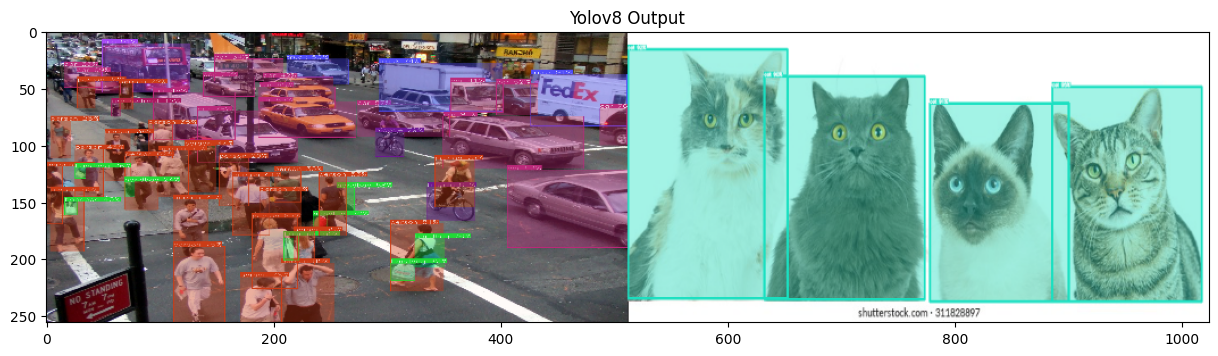

In [35]:
plt.figure(figsize=(15, 10))
plt.title('Yolov8 Output')
plt.imshow(np.hstack(all_imgs))